# Library

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 설치
!pip install --upgrade --no-cache-dir numpy seaborn
!pip install ydata_profiling
!pip install missingno
!pip install tqdm

!pip install -U kss==5.2.0
!pip install kiwipiepy
!pip install soynlp
!pip install keybert
!pip install keybert[gensim]
!pip install sentence_transformers

!pip install nltk
!pip install konlpy
!pip install gensim
!pip install bertopic -U
!pip install bertopic[visualization] -U
!pip install -U accelerate
!pip install -U transformers
!pip install datasets

!pip install catboost
!pip install tensorflow==2.15 keras==2.15
!pip install keras-tqdm
!pip install shap

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 160.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [2]:
# Auto reload of library
%load_ext autoreload
%autoreload 2

# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# Custom
## 사용자의 실제 작업경로로 설정!
work_path = '/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터'
os.chdir(work_path)
!ls
from module_KK import *

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126227 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Hyperparameter

In [3]:
# Data Preprocessing
file_location = os.path.join(os.path.join('.', 'Data', 'df_concat_BA1.csv'))
Y_colname = '기부여부'
TEST_SIZE = 0.2
RANDOM_STATE = 123
SCALER = MinMaxScaler()
LABEL_LIST = ['Non-donation', 'Donation']

# Modeling AI
## SHAP
OUTPUT_TYPE = 'logit'
MAX_DISPLAY = 30
DEPENDENCY = True

# Data Preprocessing

- 불필요 변수 삭제
- 결측치 채우기
- 이상치 처리
- 데이터 변환
- 종속변수/독립변수 & Train/Test 분리
- 스케일링

## Functionalization by ChatGPT

```python
너는 전문적인 Python 기반 Data Scientist다.
- 목표: 전처리가 완료된 함수를 생성해줘
- 함수이름: preprocessing_MDIS_KK
- 함수입력: df
- 함수출력: X_train, X_test, Y_train, Y_test, df_prep
- 출력형태: X는 모두 array, Y는 모두 dataframe, df_prep는 dataframe
- 전처리1: 결측치의 비율이 50% 넘는 변수는 삭제해줘
- 전처리2: 변수의 값의 종류가 1개인 변수는 삭제해줘
- 전처리3: ['가구일련번호', '가구원번호', '가구주관계코드', '가구가중값', '가구원가중값'] 변수들은 삭제해줘
- 전처리4: 결측치를 채워야 하는데 변수의 값의 형태가 문자인 경우엔 Temp_KK라는 값으로 채워주고, 숫자인 경우엔 값들의 "최대값+1"의 값으로 채워줘
- 전처리5: 종속변수의 이름은 "기부여부"야. 나머지는 모두 독립변수로 반영해줘
- 전처리6: train_test_split 함수를 사용하고 test_size=0.2, random_state=123을 사용해서 데이터를 분리해줘
- 전처리7: MinMaxScaler를 사용해서 X_train, X_test를 변환해줘
```

## Data Process Summary

In [4]:
def preprocessing_MDIS_KK(df):
    df_prep = df.copy()

    # 전처리 1: 결측치의 비율이 50%를 초과하는 변수 삭제
    missing_ratio = df_prep.isnull().mean()
    cols_to_drop_missing = missing_ratio[missing_ratio > 0.5].index
    df_prep.drop(cols_to_drop_missing, axis=1, inplace=True)

    # 전처리 2: 값의 종류가 1개인 변수 삭제
    cols_to_drop_single = [col for col in df_prep.columns if df_prep[col].nunique() == 1]
    df_prep.drop(cols_to_drop_single, axis=1, inplace=True)

    # 전처리 3: 분석과 무관한 변수 삭제
    irrelevant_cols = ['가구일련번호', '가구원번호', '가구주관계코드', '가구가중값', '가구원가중값']
    df_prep.drop([col for col in irrelevant_cols if col in df_prep.columns], axis=1, inplace=True)

    # 전처리 4: 결측치 처리
    for col in df_prep.columns:
        if df_prep[col].isnull().sum() > 0:
            if df_prep[col].dtype == 'object':
                df_prep[col].fillna('Temp_KK', inplace=True)
            else:
                df_prep[col].fillna(df_prep[col].max() + 1, inplace=True)

    # 전처리 5: 종속변수 설정
    Y = df_prep[['기부여부']]
    X = df_prep.drop('기부여부', axis=1)

    # 전처리 6: 데이터 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

    # 전처리 7: MinMaxScaler 적용
    numeric_cols = X_train.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()

    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    return X_train.values, X_test.values, Y_train, Y_test, df_prep

# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

(86520, 148) (86520, 1) 0.0 1.0000000000000004
(21630, 148) (21630, 1) 0.0 1.0000000000000004
Complete!


# Modeling AI

In [5]:
# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

## 1) Feature Explanation

### (1) Classical Total

In [6]:
# Classic
X_colname = [col for col in df_prep.columns if col != Y_colname]
coef = pd.DataFrame({'Features': X_colname,
                      'Coef': model.coef_[0],
                      'Odds': np.exp(model.coef_[0])})
coef_posneg = pd.concat([coef[coef.Odds >= 1].sort_values(by='Odds', ascending=False).reset_index().iloc[:,1:],
                          coef[coef.Odds < 1].sort_values(by='Odds', ascending=True).reset_index().iloc[:,1:]], axis=1)
display(coef_posneg)

,Features,Coef,Odds,Features,Coef,Odds
0,향후기부의사여부,2.376069,10.762511,선호장례방법코드_6.0,-1.049718,0.350037
1,단체참여_종교단체여부,0.967874,2.632343,분류코드_산업별코드_331.0,-0.867130,0.420155
2,교육정도코드,0.936400,2.550781,분류코드_경제활동여부,-0.554319,0.574463
3,자원봉사활동여부,0.785646,2.193824,지난1주간경제활동여부,-0.554319,0.574463
4,주관적소득수준코드,0.458800,1.582174,노후준비방법_주된방법코드_10.0,-0.523697,0.592327
...,...,...,...,...,...,...
74,NaN,NaN,NaN,생활여건변화_사회보장제도코드,-0.015212,0.984903
75,NaN,NaN,NaN,주중여가활동_동반자코드_3.0,-0.012963,0.987121
76,NaN,NaN,NaN,주말여가활동_동반자코드_3.0,-0.012502,0.987576
77,NaN,NaN,NaN,노후준비방법_주된방법코드_4.0,-0.009902,0.990147


### (2) XAI Individual

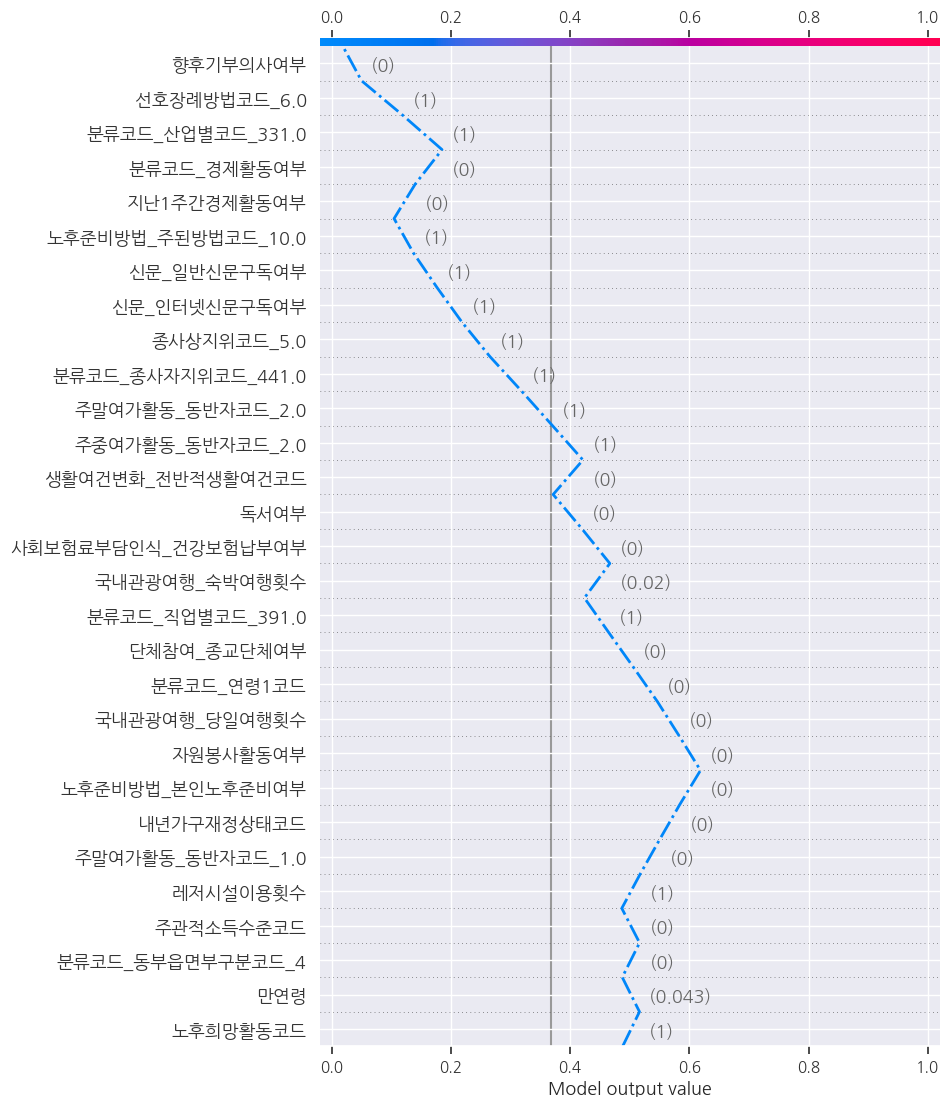

In [7]:
# SHAP
explainer = shap.Explainer(model, X_train,
                           model_type='linear', feature_names=X_colname)
shap_values_train = explainer(X_train)
shap_values_test = explainer(X_test)

# Individual Explanation
shap_sample = shap_values_train.sample(1)
shap.decision_plot(base_value=shap_sample.base_values,
                   shap_values=shap_sample.values,
                   features=shap_sample.data,
                   feature_names=X_colname,
                   feature_display_range=slice(None, -MAX_DISPLAY, -1),
                   link='logit', highlight=0)

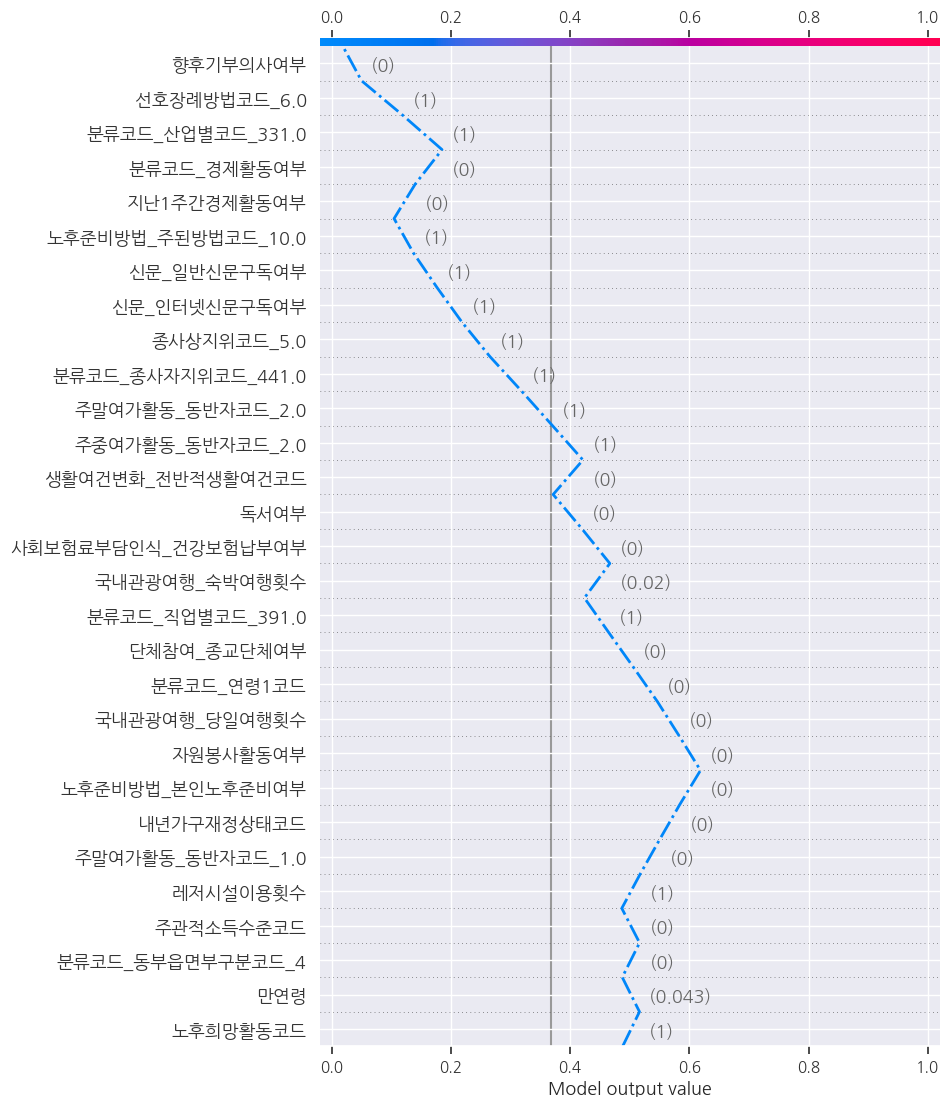

In [8]:
# SHAP
explainer = shap.Explainer(model, X_train,
                           model_type='linear', feature_names=X_colname)
shap_values_train = explainer(X_train)
shap_values_test = explainer(X_test)

# Individual Explanation
shap_sample = shap_values_train.sample(1)
shap.decision_plot(base_value=shap_sample.base_values,
                   shap_values=shap_sample.values,
                   features=shap_sample.data,
                   feature_names=X_colname,
                   feature_display_range=slice(None, -MAX_DISPLAY, -1),
                   link='logit', highlight=0)
shap.initjs()
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))
shap.initjs()
shap_sample = shap_values_train.sample(100)
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))


### (3) XAI Total

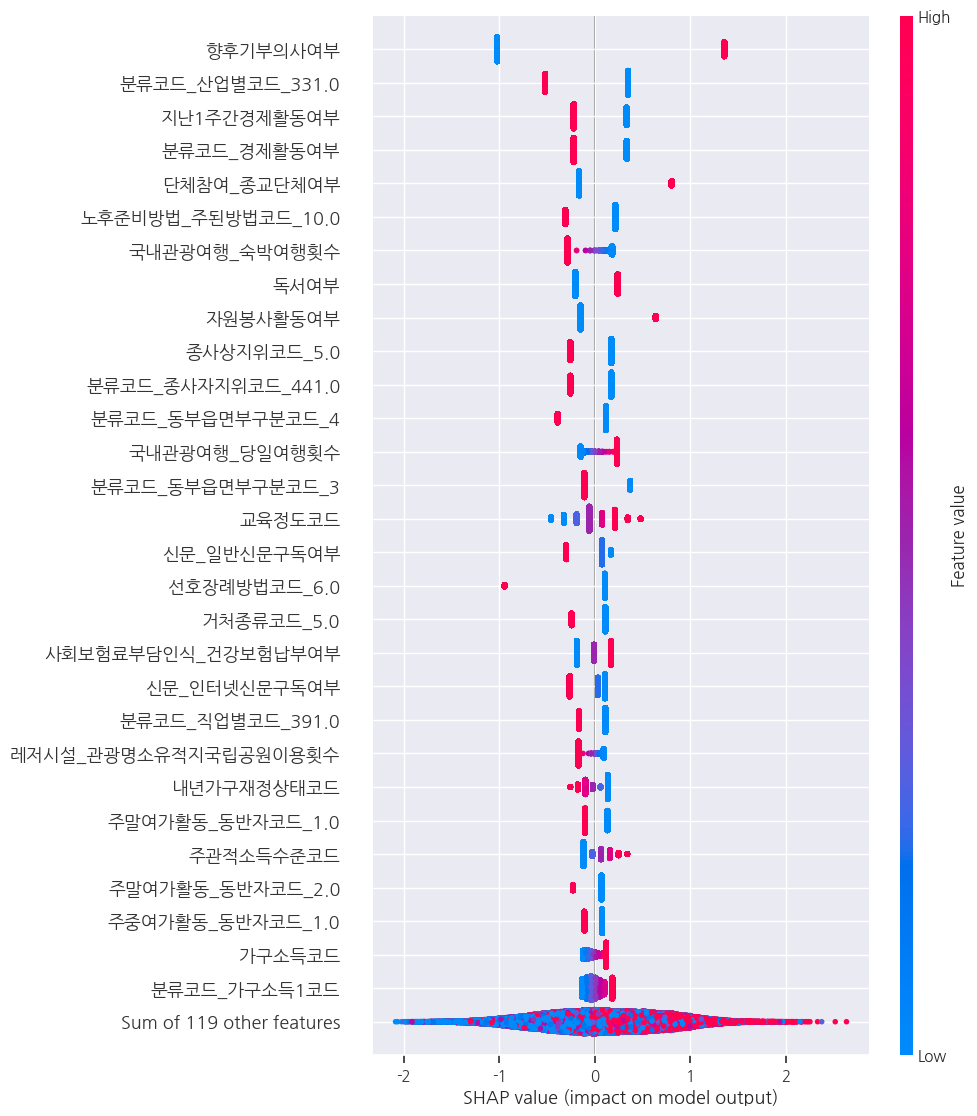

In [9]:
# Total Explanation
shap.plots.beeswarm(shap_values=shap_values_train, max_display=MAX_DISPLAY)

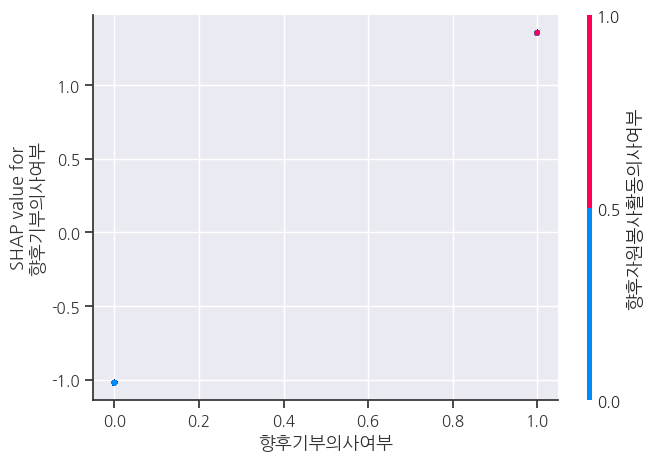

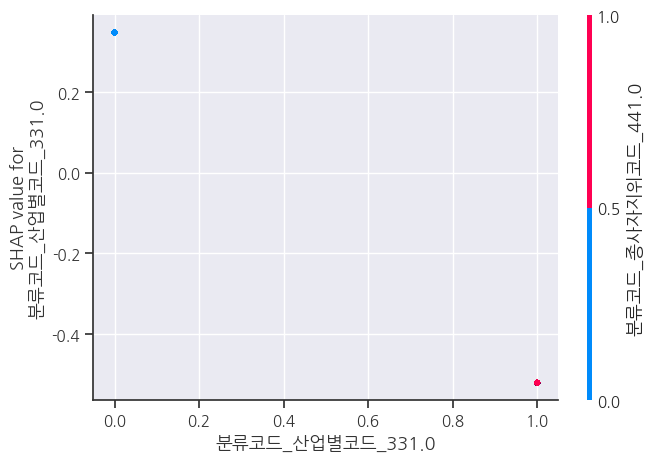

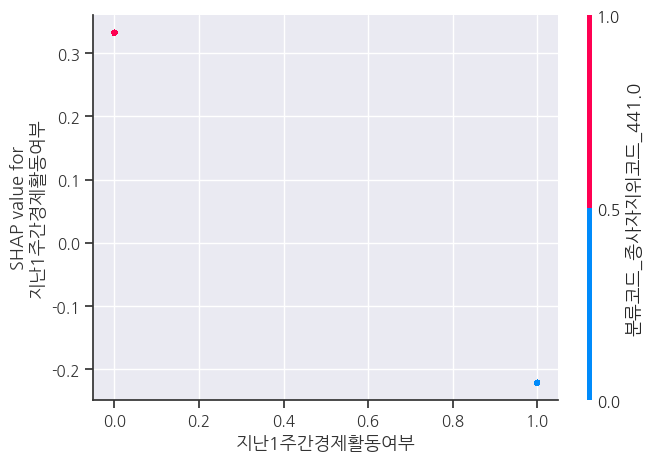

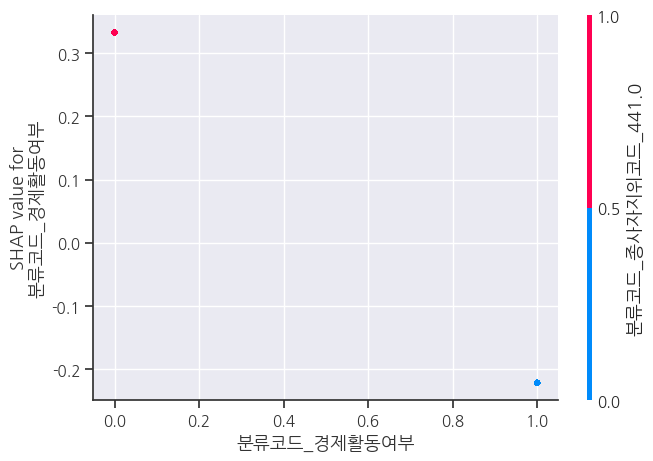

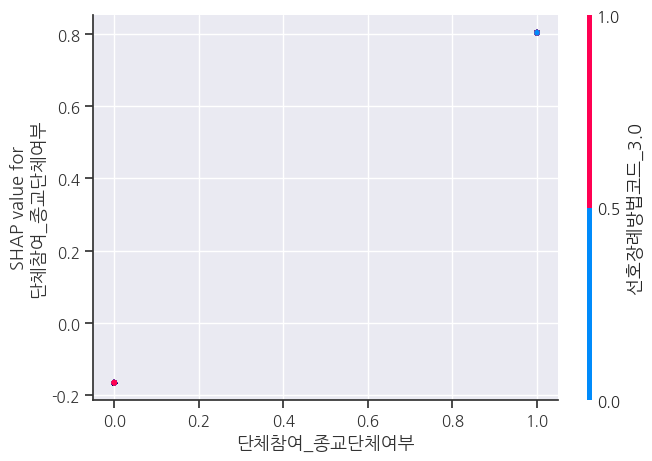

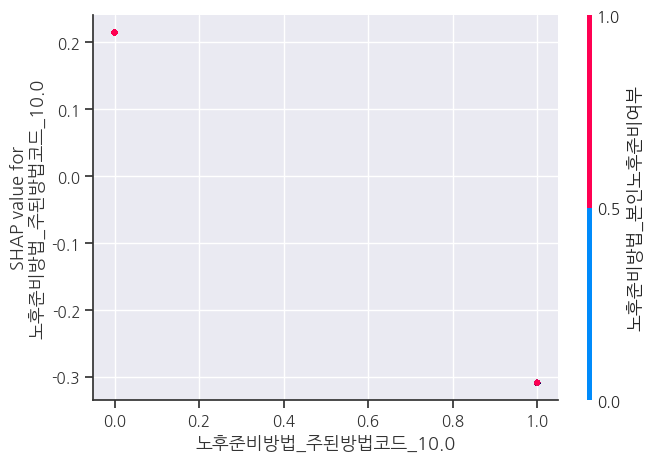

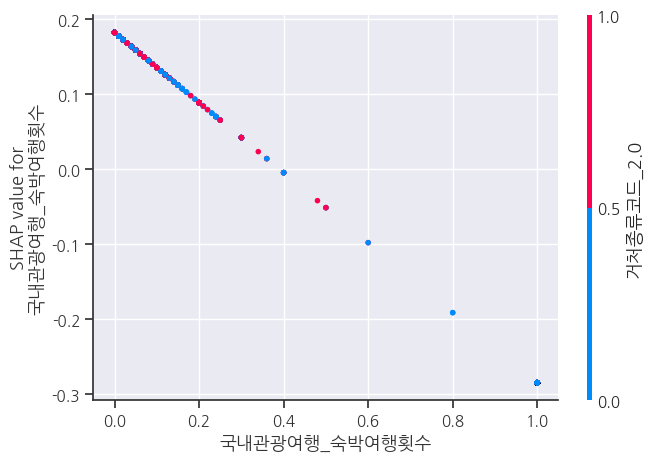

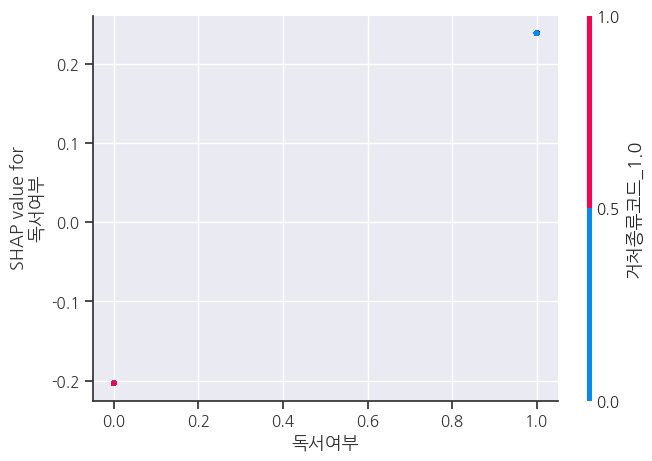

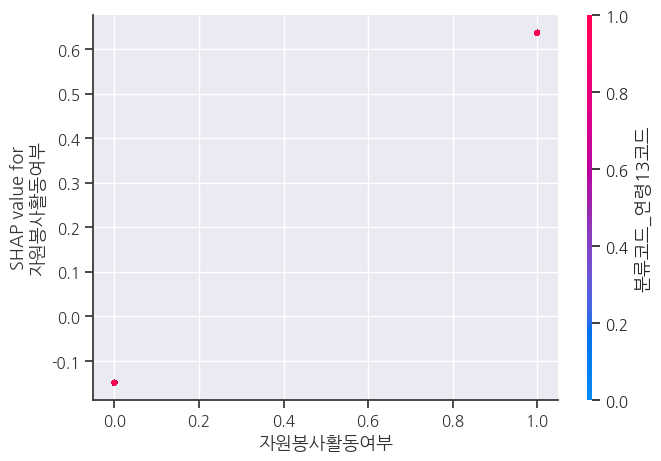

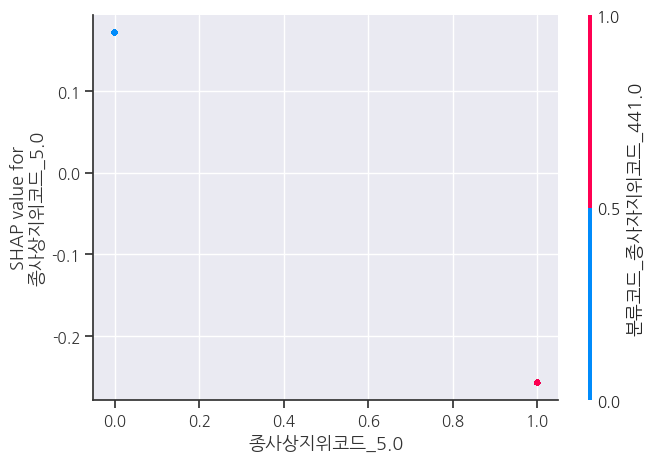

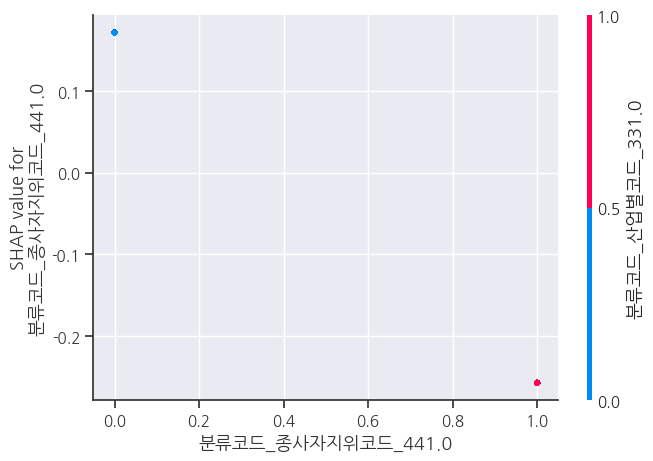

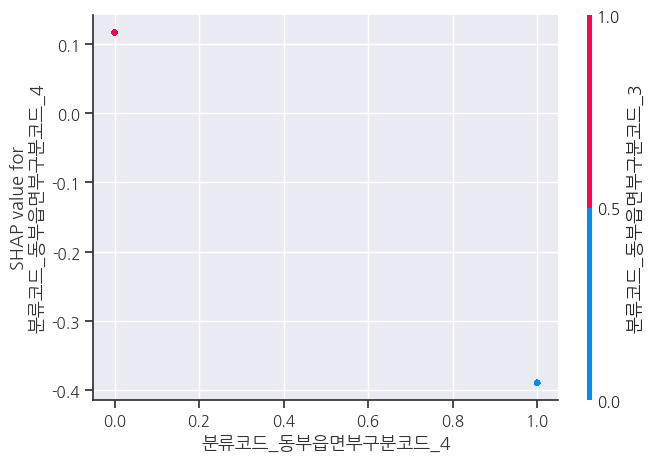

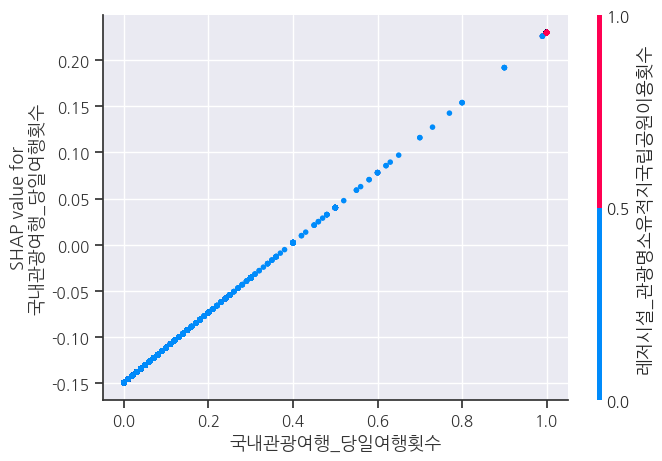

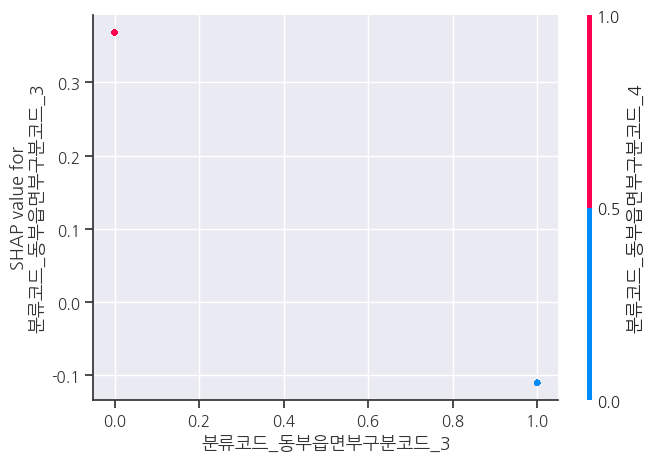

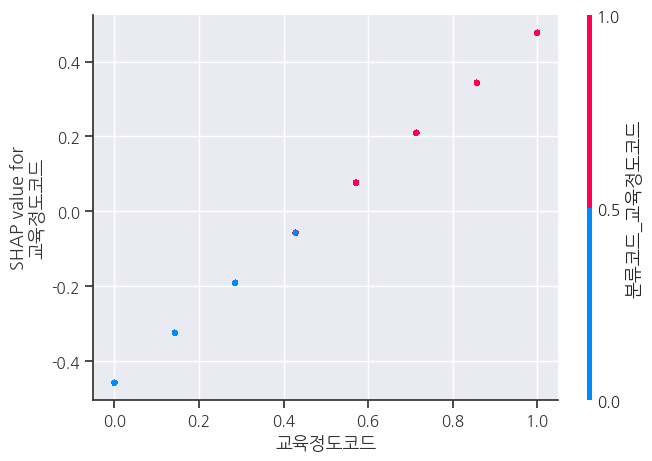

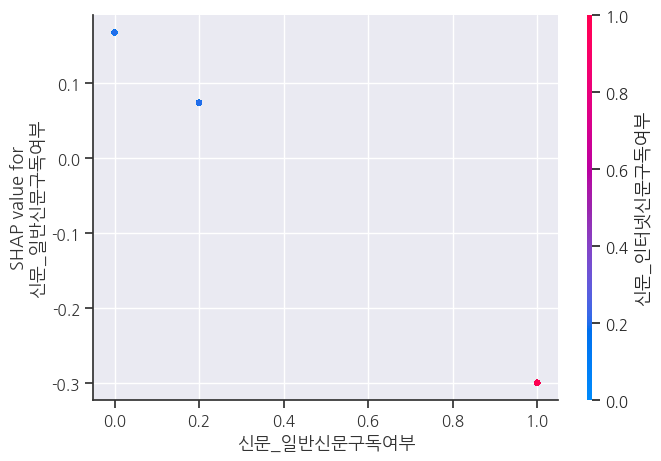

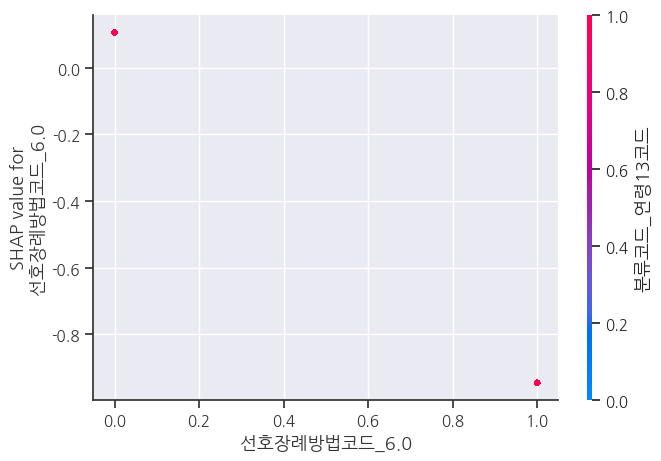

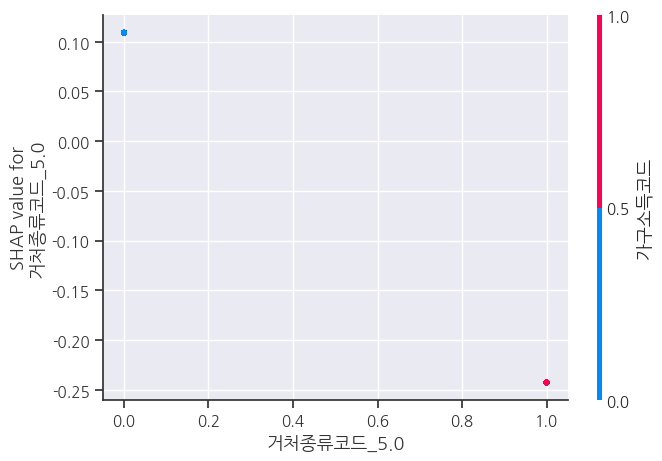

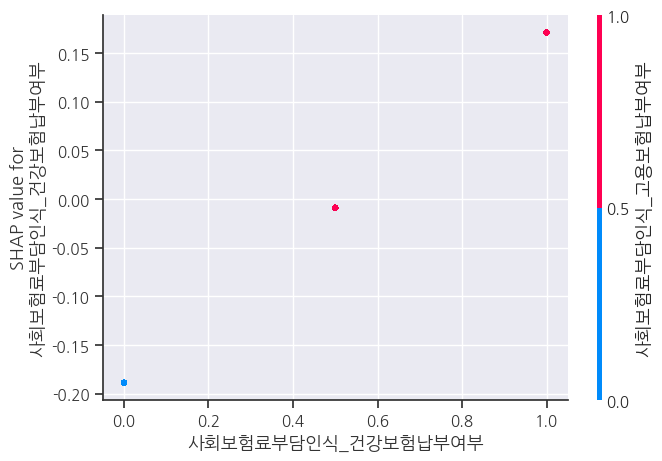

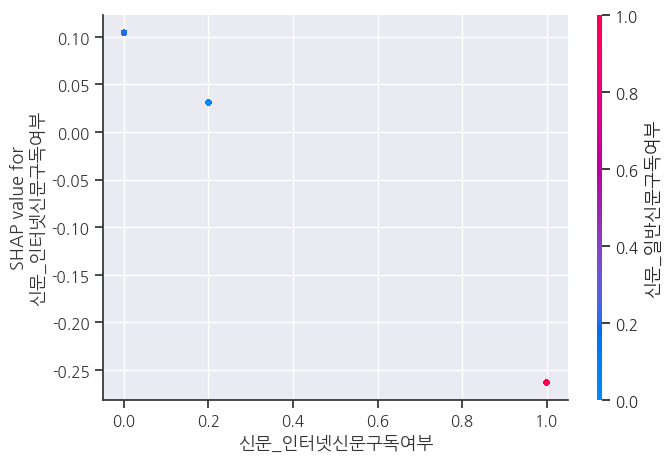

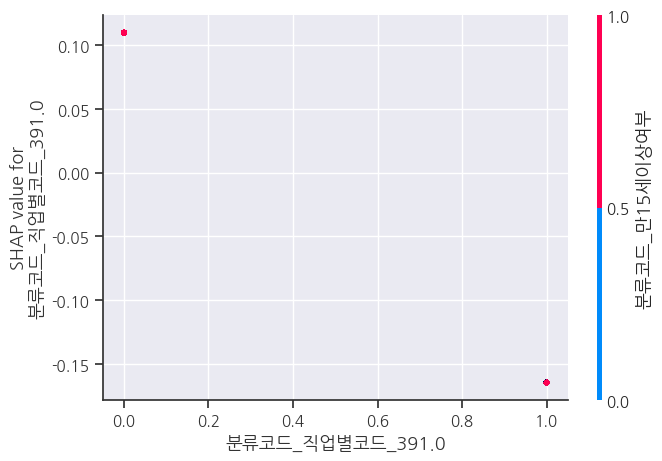

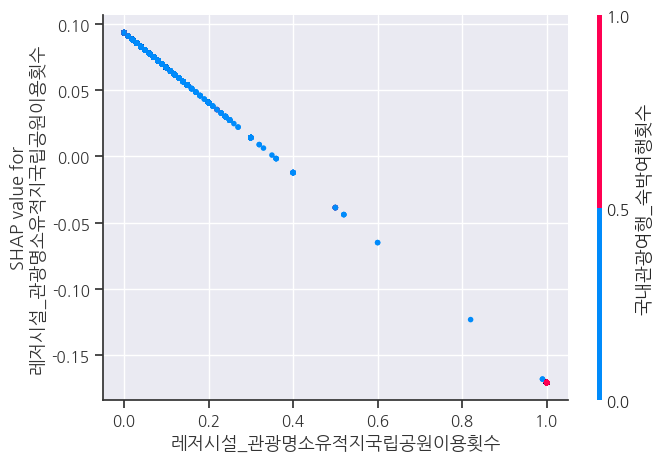

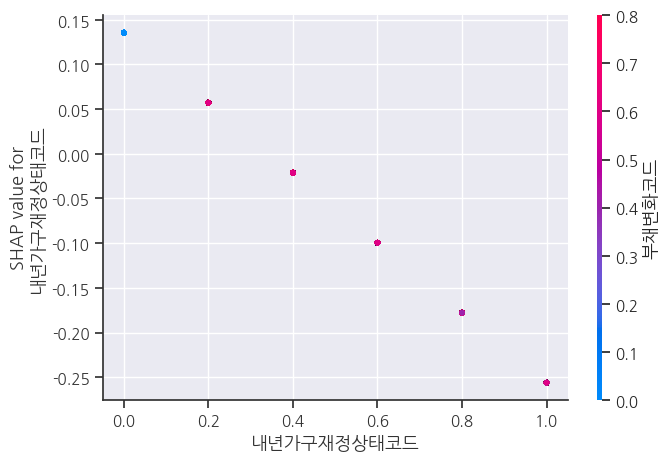

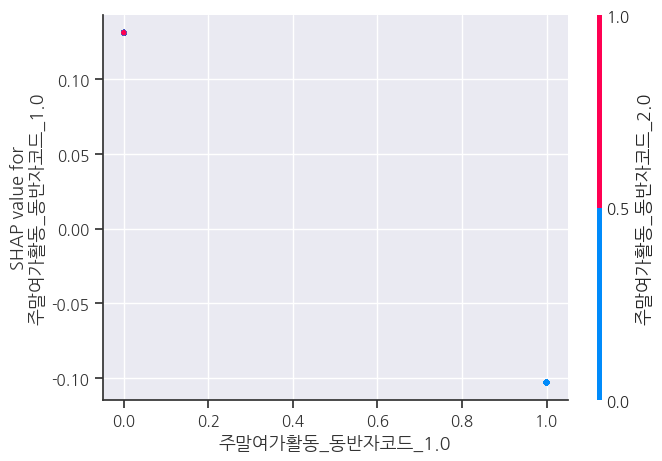

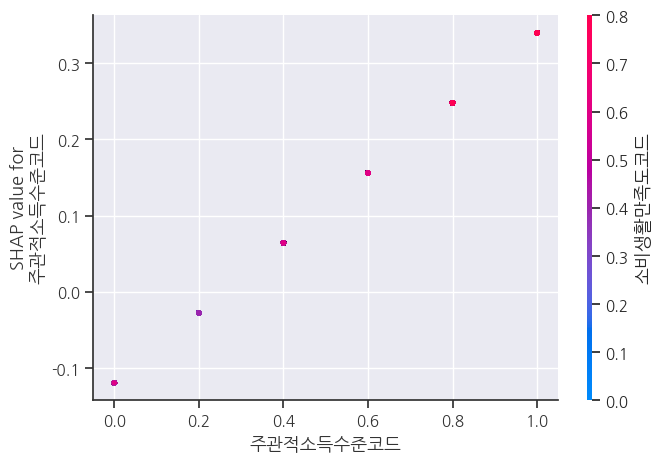

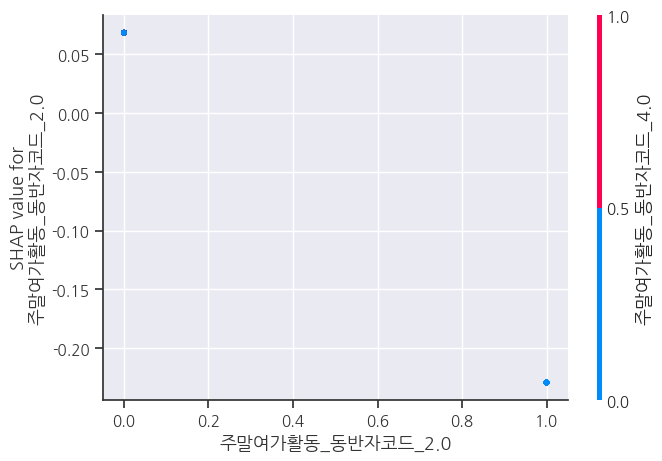

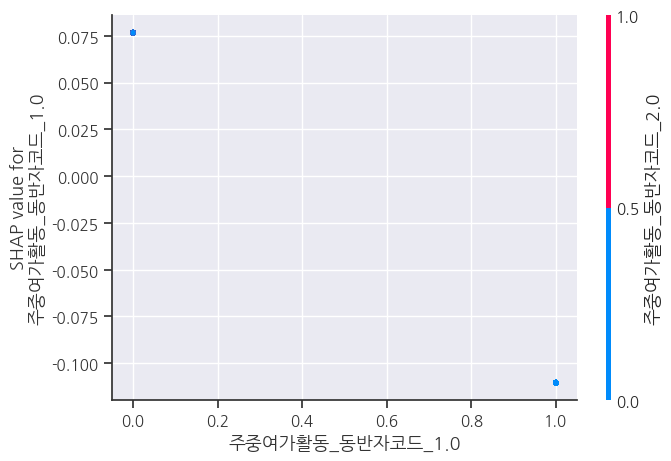

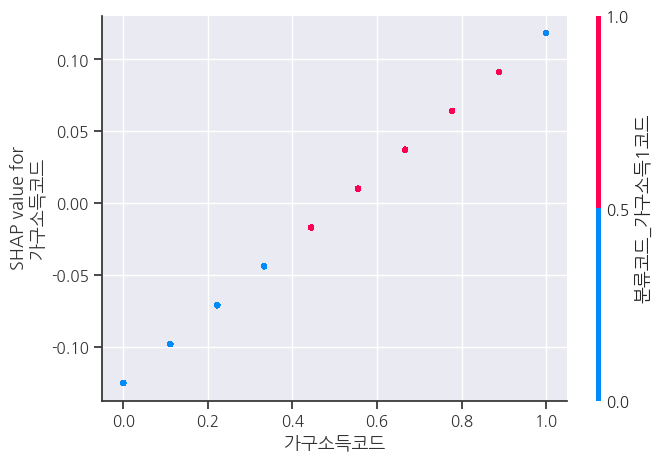

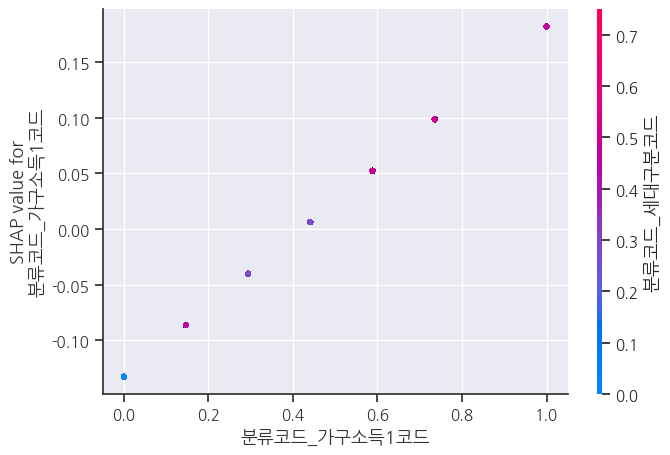

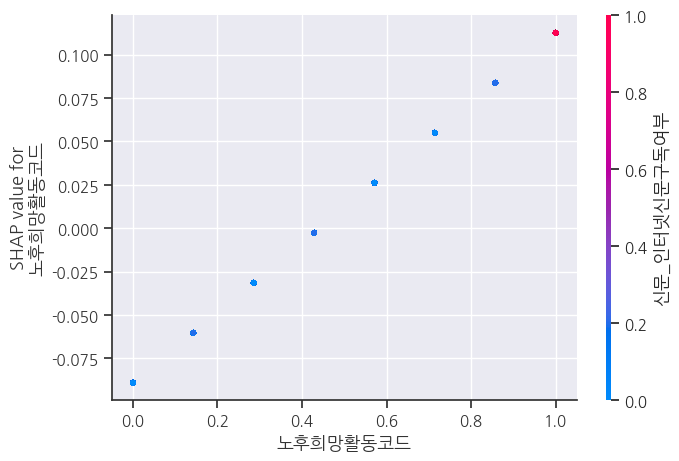

In [10]:
# Total Explanation by Interaction
shap_importance = np.abs(shap_values_train.values).mean(axis=0)
feature_order = np.argsort(shap_importance)[::-1]
feature_order = [X_colname[i] for i in feature_order]

for col in feature_order[:MAX_DISPLAY]:
  shap.dependence_plot(ind=col, shap_values=shap_values_train.values,
                       features=X_train, feature_names=X_colname)

### Functionalization by ChatGPT

```python
너는 전문적인 Python 기반 Data Scientist다.
- 목표: 모델을 설명하는 함수를 생성해줘
- 함수이름: explanation_SHAP_KK
- 함수입력: 아래 기능들을 실행하기 위해 필요한 파라미터를 사용하되, 일반화된 사용을 위해 최대한 입력 파라미터를 다양하게 반영해줘
- 포함기능1:
# SHAP
explainer = shap.Explainer(model, X_train,
                           model_type='linear', feature_names=X_colname)
shap_values_train = explainer(X_train)
shap_values_test = explainer(X_test)

# Individual Explanation
shap_sample = shap_values_train.sample(1)
shap.decision_plot(base_value=shap_sample.base_values,
                   shap_values=shap_sample.values,
                   features=shap_sample.data,
                   feature_names=X_colname,
                   feature_display_range=slice(None, -MAX_DISPLAY, -1),
                   link='logit', highlight=0)
shap.initjs()
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))
shap.initjs()
shap_sample = shap_values_train.sample(1000)
display(shap.force_plot(base_value=shap_sample.base_values,
                        shap_values=shap_sample.values,
                        features=shap_sample.data,
                        feature_names=X_colname,
                        link='logit'))

- 포함기능2:
# Total Explanation
shap.plots.beeswarm(shap_values=shap_values_train, max_display=MAX_DISPLAY)

- 포함기능3:
# Total Explanation by Interaction
shap_importance = np.abs(shap_values_train.values).mean(axis=0)
feature_order = np.argsort(shap_importance)[::-1]
feature_order = [X_colname[i] for i in feature_order]

for col in feature_order[:MAX_DISPLAY]:
  shap.dependence_plot(ind=col, shap_values=shap_values_train.values,
                       features=X_train, feature_names=X_colname)

- 포함기능4: 위의 3가지 포함기능은 모두 shap_values_train에 대한 결과만 제공한다. 따라서 shap_values_test의 결과도 출력하되 결과가 train에 대한 것인지 test에 대한 것인지 함께 표시해줘
```

In [11]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def explanation_SHAP_KK(model, X_train, X_test, X_colname,
                        MAX_DISPLAY=10, model_type='linear',
                        link='logit', sample_size=1,
                        sample_size_1000=1000,
                        plot_interaction=True,
                        feature_display_range=None):
    """
    SHAP 설명을 제공하는 함수.

    Parameters:
    - model: 학습된 모델 (예: XGBClassifier, LogisticRegression)
    - X_train: 훈련 데이터 (특징 행렬)
    - X_test: 테스트 데이터
    - X_colname: 특성 이름 리스트 (예: ['feature1', 'feature2', ...])
    - MAX_DISPLAY: SHAP 설명에서 표시할 최대 특성 수 (기본값 10)
    - model_type: 모델 유형 ('linear', 'tree', 'svm', 'auto' 등, 기본값 'linear')
    - link: 로짓 링크 함수 (기본값 'logit')
    - sample_size: 개별 설명을 위한 샘플 크기 (기본값 1)
    - sample_size_1000: 1000개의 샘플에 대해 설명할 때 샘플 크기 (기본값 1000)
    - plot_interaction: 상호작용 설명을 플로팅할지 여부 (기본값 True)
    - feature_display_range: 특성 표시 범위 (기본값 None)
    """

    # SHAP 설명자 생성
    explainer = shap.Explainer(model, X_train, algorithm=model_type, feature_names=X_colname)
    shap_values_train = explainer(X_train)
    shap_values_test = explainer(X_test)

    # 개별 설명 (샘플 1) for Train
    shap_sample_train = shap_values_train.sample(sample_size)
    print("Train Sample Explanation:")
    shap.decision_plot(base_value=shap_sample_train.base_values,
                       shap_values=shap_sample_train.values,
                       features=shap_sample_train.data,
                       feature_names=X_colname,
                       feature_display_range=feature_display_range or slice(None, -MAX_DISPLAY, -1),
                       link=link, highlight=0)
    shap.initjs()
    display(shap.force_plot(base_value=shap_sample_train.base_values,
                            shap_values=shap_sample_train.values,
                            features=shap_sample_train.data,
                            feature_names=X_colname,
                            link=link))

    # 개별 설명 (샘플 1) for Test
    shap_sample_test = shap_values_test.sample(sample_size)
    print("Test Sample Explanation:")
    shap.decision_plot(base_value=shap_sample_test.base_values,
                       shap_values=shap_sample_test.values,
                       features=shap_sample_test.data,
                       feature_names=X_colname,
                       feature_display_range=feature_display_range or slice(None, -MAX_DISPLAY, -1),
                       link=link, highlight=0)
    shap.initjs()
    display(shap.force_plot(base_value=shap_sample_test.base_values,
                            shap_values=shap_sample_test.values,
                            features=shap_sample_test.data,
                            feature_names=X_colname,
                            link=link))

    # 개별 설명 (샘플 1000) for Train
    shap_sample_train = shap_values_train.sample(sample_size_1000)
    print("Train Sample 1000 Explanation:")
    shap.initjs()
    display(shap.force_plot(base_value=shap_sample_train.base_values,
                            shap_values=shap_sample_train.values,
                            features=shap_sample_train.data,
                            feature_names=X_colname,
                            link=link))

    # 개별 설명 (샘플 1000) for Test
    shap_sample_test = shap_values_test.sample(sample_size_1000)
    print("Test Sample 1000 Explanation:")
    shap.initjs()
    display(shap.force_plot(base_value=shap_sample_test.base_values,
                            shap_values=shap_sample_test.values,
                            features=shap_sample_test.data,
                            feature_names=X_colname,
                            link=link))

    # 전체 설명 (beeswarm 플롯) for Train
    print("Train Total Explanation (Beeswarm):")
    shap.plots.beeswarm(shap_values=shap_values_train, max_display=MAX_DISPLAY)

    # 전체 설명 (beeswarm 플롯) for Test
    print("Test Total Explanation (Beeswarm):")
    shap.plots.beeswarm(shap_values=shap_values_test, max_display=MAX_DISPLAY)

    # 상호작용 설명 (dependence plot) for Train
    if plot_interaction:
        print("Train Total Explanation by Interaction:")
        shap_importance_train = np.abs(shap_values_train.values).mean(axis=0)
        feature_order_train = np.argsort(shap_importance_train)[::-1]
        feature_order_train = [X_colname[i] for i in feature_order_train]

        for col in feature_order_train[:MAX_DISPLAY]:
            shap.dependence_plot(ind=col, shap_values=shap_values_train.values,
                                 features=X_train, feature_names=X_colname)

        # 상호작용 설명 (dependence plot) for Test
        print("Test Total Explanation by Interaction:")
        shap_importance_test = np.abs(shap_values_test.values).mean(axis=0)
        feature_order_test = np.argsort(shap_importance_test)[::-1]
        feature_order_test = [X_colname[i] for i in feature_order_test]

        for col in feature_order_test[:MAX_DISPLAY]:
            shap.dependence_plot(ind=col, shap_values=shap_values_test.values,
                                 features=X_test, feature_names=X_colname)


In [12]:
# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

Output hidden; open in https://colab.research.google.com to view.

## 2) Prediction Explanation

In [14]:
# Prediction
P_trpred = pd.DataFrame(model.predict_proba(X_train)[:,-1],
                        index=Y_train.index, columns=['Pred'])
P_tepred = pd.DataFrame(model.predict_proba(X_test)[:,-1],
                        index=Y_test.index, columns=['Pred'])
Y_trpred = (P_trpred >= 0.5).astype(int)
Y_tepred = (P_tepred >= 0.5).astype(int)

In [15]:
# Evaluation
metrics.confusion_matrix(Y_test, Y_tepred)

array([[13465,  3249],
       [  808,  4108]])

In [16]:
# Metrics
precision = metrics.precision_score(Y_test, Y_tepred)
recall = metrics.recall_score(Y_test, Y_tepred, pos_label=1)
f1_score = metrics.f1_score(Y_test, Y_tepred)
accuracy = metrics.accuracy_score(Y_test, Y_tepred)
balanced_accuracy = metrics.balanced_accuracy_score(Y_test, Y_tepred)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_tepred)
auc = metrics.auc(fpr, tpr)
[precision, recall, f1_score, accuracy, balanced_accuracy, auc]

[0.5583797743645508,
 0.8356387306753458,
 0.6694369754746191,
 0.8124364308830329,
 0.8206253962099954,
 0.8206253962099955]

### Functionalization by ChatGPT

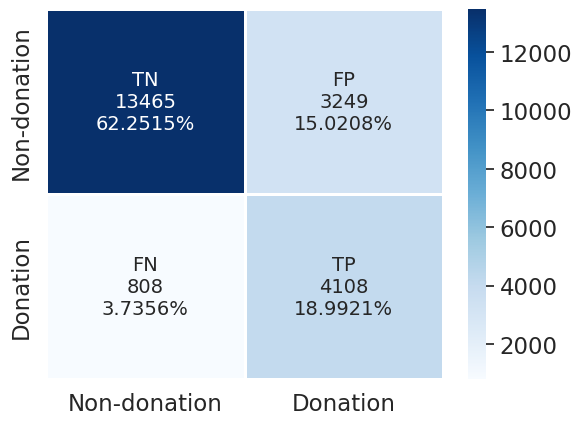

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test,21630,4108,13465,3249,808,0.55838,0.835639,0.805612,0.669437,0.812436,0.820625,0.820625


In [17]:
# Minor Function
evaluation_class_ConfusionMatrix(Y_test, Y_tepred, label_list=LABEL_LIST)
evaluation_class_Metrics(Y_test, Y_tepred)

Performance: 


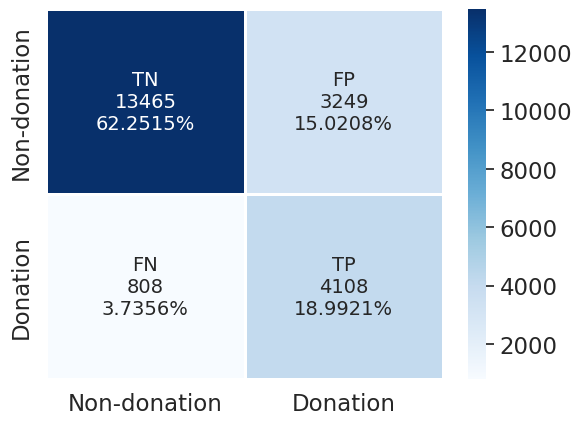

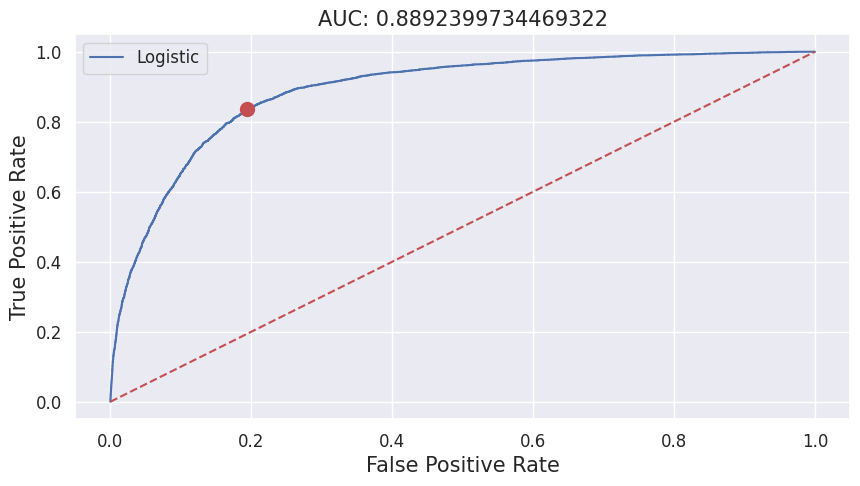

,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Test set,21630,4108,13465,3249,808,0.55838,0.835639,0.805612,0.669437,0.812436,0.820625,0.88924


,N,True Positive,True Negative,False Positive,False Negative,Precision,Recall,Specificity,F1-score,Accuracy,Balanced Accuracy,AUC
Entire population,108150,20953,66599,16573,4025,0.55836,0.838858,0.800738,0.670453,0.809542,0.819798,0.890385


In [18]:
# Major Function
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

# BA Process Summary

In [19]:
# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [20]:
# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
X_colname = [col for col in df_prep.columns if col != Y_colname]
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

# Logistic Regression
model = LogisticRegression(fit_intercept=True, class_weight='balanced')
model.fit(X_train, Y_train)

# Explanation
explanation_SHAP_KK(model, X_train, X_test, X_colname,
                    MAX_DISPLAY=MAX_DISPLAY, model_type='linear',
                    link=OUTPUT_TYPE, sample_size=1,
                    sample_size_1000=1000,
                    plot_interaction=True)

# Prediction & Evaluation
Score_te, Score_trte = prediction_class(model, X_train, Y_train, X_test, Y_test,
                                        LABEL_LIST=LABEL_LIST, ALGO_NAME='Logistic')
display(Score_te, Score_trte)

Output hidden; open in https://colab.research.google.com to view.